In [192]:
from sklearn.model_selection import train_test_split
from skimage.io import imread
from keras.preprocessing.image import img_to_array, array_to_img
import keras
from keras.layers import Dense
from keras import Sequential
from keras.callbacks import Callback # Custom Callback
from keras.utils import to_categorical
from sklearn.svm import SVC
import os
import numpy as np
import cv2

In [78]:
male_path = "/Users/aaditkapoor/Desktop/ml-class-face/male"
female_path = "/Users/aaditkapoor/Desktop/ml-class-face/female"
def return_path(image_name, type="male"):
    if type=="male":
        return male_path+"/"+image_name
    else:
        return female_path+"/"+image_name
    
data = [[[]]]
features_m = np.array(data)
features_m.ndim

3

In [137]:
# Getting male images
images = []
labels = []
for male in os.listdir(male_path):
    if male==".DS_Store":
        pass
    else:
        image = imread(return_path(male, type="male"), as_grey=True)
        images.append(image)
        labels.append(1)

In [138]:
for female in os.listdir(female_path):
    image = imread(return_path(female, type="female"), as_grey=True)
    images.append(image)
    labels.append(0)

In [111]:
type(females)

list

In [119]:
features = []

In [120]:
features.extend([males, females])

In [121]:
features = np.array(features)

In [122]:
features

array([[[[3.70000000e+01, 3.60000000e+01, 3.20000000e+01, ...,
          3.20000000e+01, 3.20000000e+01, 3.40000000e+01],
         [3.30000000e+01, 3.60000000e+01, 3.80000000e+01, ...,
          3.10000000e+01, 3.70000000e+01, 3.90000000e+01],
         [4.00000000e+01, 3.40000000e+01, 4.30000000e+01, ...,
          3.10000000e+01, 4.10000000e+01, 4.30000000e+01],
         ...,
         [1.35000000e+02, 1.36000000e+02, 1.39000000e+02, ...,
          6.10000000e+01, 6.30000000e+01, 6.00000000e+01],
         [1.33000000e+02, 1.29000000e+02, 1.35000000e+02, ...,
          6.00000000e+01, 5.90000000e+01, 6.00000000e+01],
         [1.38000000e+02, 1.31000000e+02, 1.32000000e+02, ...,
          5.90000000e+01, 5.70000000e+01, 5.80000000e+01]],

        [[7.30000000e+01, 9.00000000e+01, 9.50000000e+01, ...,
          1.56000000e+02, 1.64000000e+02, 1.62000000e+02],
         [8.50000000e+01, 1.04000000e+02, 9.50000000e+01, ...,
          1.65000000e+02, 1.61000000e+02, 1.60000000e+02],
        

In [123]:
features.shape

(2, 200, 90, 90)

In [125]:
features

array([[[[3.70000000e+01, 3.60000000e+01, 3.20000000e+01, ...,
          3.20000000e+01, 3.20000000e+01, 3.40000000e+01],
         [3.30000000e+01, 3.60000000e+01, 3.80000000e+01, ...,
          3.10000000e+01, 3.70000000e+01, 3.90000000e+01],
         [4.00000000e+01, 3.40000000e+01, 4.30000000e+01, ...,
          3.10000000e+01, 4.10000000e+01, 4.30000000e+01],
         ...,
         [1.35000000e+02, 1.36000000e+02, 1.39000000e+02, ...,
          6.10000000e+01, 6.30000000e+01, 6.00000000e+01],
         [1.33000000e+02, 1.29000000e+02, 1.35000000e+02, ...,
          6.00000000e+01, 5.90000000e+01, 6.00000000e+01],
         [1.38000000e+02, 1.31000000e+02, 1.32000000e+02, ...,
          5.90000000e+01, 5.70000000e+01, 5.80000000e+01]],

        [[7.30000000e+01, 9.00000000e+01, 9.50000000e+01, ...,
          1.56000000e+02, 1.64000000e+02, 1.62000000e+02],
         [8.50000000e+01, 1.04000000e+02, 9.50000000e+01, ...,
          1.65000000e+02, 1.61000000e+02, 1.60000000e+02],
        

In [130]:
images[0].shape

(90, 90)

In [139]:
images = np.array(images)

In [140]:

labels = np.array(labels)

In [141]:
images = images.reshape(400, -1)

In [142]:
images.shape

(400, 8100)

In [145]:
features_train, features_test, labels_train,labels_test = train_test_split(images, labels, shuffle=True)

In [144]:
from sklearn.decomposition import PCA
pca = PCA()

In [146]:
pca.fit(images)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [147]:
import matplotlib.pyplot as plt

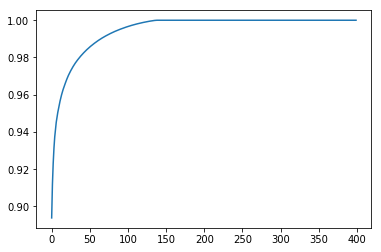

In [148]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [149]:
pca = PCA(n_components=400)

In [150]:
images = pca.fit_transform(images)

In [184]:
features_train, features_test, labels_train,labels_test = train_test_split(images, labels, shuffle=True, random_state=14)

In [174]:
clf = SVC(kernel="linear")

In [175]:
clf.fit(features_train, labels_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [176]:
clf.score(features_test, labels_test)

0.91

In [177]:
pred = clf.predict(features_test)

In [156]:
pred

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [157]:
np.where(pred!=labels_test)

(array([21, 69, 82]),)

In [159]:
np.bincount(labels_test)

array([45, 55])

In [178]:
clf.score(features_train, labels_train)

1.0

In [188]:
model = Sequential()
model.add(Dense(100, input_dim=features_train.shape[1],activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=['acc'])

In [189]:
labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)

In [190]:
labels_train

array([[[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       ...,

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.]]], dtype=float32)

In [191]:
model.fit(features_train, labels_train, epochs=100, batch_size=50, validation_data=(features_test, labels_test))

ValueError: Error when checking target: expected dense_7 to have 2 dimensions, but got array with shape (300, 2, 2)